In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


In [ ]:
! pip install qrcode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 4.4 MB/s eta 0:00:00


In [ ]:
!pip install inference-sdk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.8 MB/s eta 0:00:00


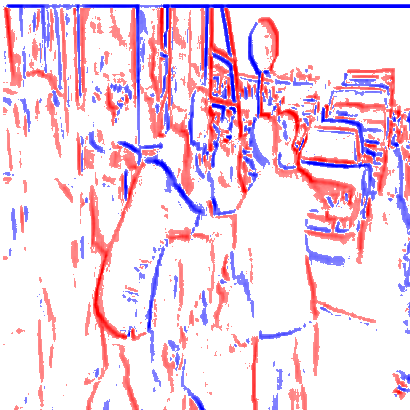

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
# 假设这是你的图像路径
image_path = "/content/V_272_F96_jpg.rf.449afadeef4c2c034dc3ed9b662013cc.jpg"
gray_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

xshift = 3
yshift = -3
xlong = gray_img.shape[1] - 2 * abs(xshift)
ylong = gray_img.shape[0] - 2 * abs(yshift)
pic_shape = [ylong, xlong, 3]

# 设置背景为白色
img = np.full(pic_shape, 255, dtype=np.uint8)  # 全白背景

# 转换到HSV空间
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

for i in range(abs(yshift), ylong):
    for j in range(abs(xshift), xlong):
        diff = int(gray_img[i+yshift][j+xshift]) - int(gray_img[i][j])
        if diff > 10:  # 假设阈值为10
            # 根据差值调整颜色，这里以蓝色为基准，动态调整饱和度
            hue = 120  # 蓝色的H值
            saturation = min(255, 100 + diff)  # 饱和度基于差值调整
            img_hsv[i, j] = [hue, saturation, 255]  # V值保持最大表示亮度最高
        elif diff < -20:  # 假设阈值为-20
            # 根据差值调整颜色，这里以红色为基准，动态调整饱和度
            hue = 0  # 红色的H值
            saturation = min(255, 100 - diff)  # 饱和度基于差值调整
            img_hsv[i, j] = [hue, saturation, 255]

# 转换回RGB空间
img_rgb = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

# 显示结果
cv2_imshow(img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
 ! pip install moviepy librosa opencv-python numpy

In [ ]:
! pip install opencv-contrib-python

In [ ]:
import numpy as np
import cv2

def process_frame(gray_img):
    xshift = 3
    yshift = -3
    xlong = gray_img.shape[1] - 2 * abs(xshift)
    ylong = gray_img.shape[0] - 2 * abs(yshift)
    pic_shape = [ylong, xlong, 3]

    # 设置背景为白色
    img = np.full(pic_shape, 255, dtype=np.uint8)

    # 转换到HSV空间
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    for i in range(abs(yshift), ylong):
        for j in range(abs(xshift), xlong):
            diff = int(gray_img[i+yshift, j+xshift]) - int(gray_img[i, j])
            if diff > 10:  # 假设阈值为10
                hue = 120
                saturation = min(255, 100 + diff)
                img_hsv[i, j] = [hue, saturation, 255]
            elif diff < -20:  # 假设阈值为-20
                hue = 0
                saturation = min(255, 100 - diff)
                img_hsv[i, j] = [hue, saturation, 255]

    # 转换回RGB空间
    img_rgb = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

    return img_rgb

# 视频路径
video_path = "/content/316ca50e2edfac7e1660e09fb586b3a2.mp4"
cap = cv2.VideoCapture(video_path)

# 获取视频的宽度和高度
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# 设置输出视频
out = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 20.0, (frame_width, frame_height))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        processed_frame = process_frame(gray_frame)
        # 确保处理后的帧大小与原视频相同
        processed_frame_resized = cv2.resize(processed_frame, (frame_width, frame_height))
        out.write(processed_frame_resized)
    else:
        break

cap.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
! pip install moviepy librosa opencv-python-headless numpy

In [ ]:
from moviepy.editor import VideoFileClip, AudioFileClip
import librosa
import numpy as np
import cv2

def extract_audio_features(audio_path):
    y, sr = librosa.load(audio_path)
    # 计算MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    # 计算每秒的帧数
    hop_length = 512  # 默认值
    frames_per_second = sr // hop_length
    # 计算每1秒的MFCC平均值
    mfcc_avg_per_second = []
    for i in range(0, mfcc.shape[1], frames_per_second):
        mfcc_avg = np.mean(mfcc[:, i:i+frames_per_second], axis=1)
        mfcc_avg_per_second.append(mfcc_avg)
    mfcc_avg_per_second = np.array(mfcc_avg_per_second)
    # 返回每秒MFCC平均值的列表
    return mfcc_avg_per_second

def process_frame(frame, audio_feature, max_feature):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask_white = cv2.inRange(hsv, np.array([0,0,255]), np.array([0,0,255]))
    mask_white_inv = cv2.bitwise_not(mask_white)
    green_hue = 60  # 绿色的H值

    # 确保audio_feature是标量
    if isinstance(audio_feature, np.ndarray):
        audio_feature = audio_feature[0]  # 选择MFCC向量的第一个元素

    # 根据音频特征设置饱和度和亮度
    saturation = 255
    value = int((audio_feature / max_feature) * 255) if max_feature > 0 else 0
    green_color = np.uint8([[[green_hue, saturation, value]]])
    green_hsv = cv2.cvtColor(green_color, cv2.COLOR_BGR2HSV)
    green_hsv_pixel = green_hsv[0,0]
    hsv[mask_white == 255] = green_hsv_pixel
    frame_processed = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return frame_processed


# 第一步：从视频A中提取音频
video_a_path = '/content/316ca50e2edfac7e1660e09fb586b3a2.mp4'
video_a = VideoFileClip(video_a_path)
audio_a = video_a.audio
audio_a_path = 'temp_audio_a.mp3'
audio_a.write_audiofile(audio_a_path)

# 第二步：计算音频特征（MFCC）
audio_features = extract_audio_features(audio_a_path)
max_feature = np.max(audio_features)

# 第三步：读取视频B并处理每一帧
video_b_path = '/content/output.mp4'
video_b = VideoFileClip(video_b_path)

output_video_path = 'output_video2.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, video_b.fps, video_b.size)

for i, frame in enumerate(video_b.iter_frames()):
    frame_index = int(i * 0.5 * video_b.fps)
    if frame_index < len(audio_features):
        audio_feature = audio_features[frame_index]
    else:
        audio_feature = 0
    frame_processed = process_frame(frame, audio_feature, max_feature)
    out.write(frame_processed)

out.release()


MoviePy - Writing audio in temp_audio_a.mp3


For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  green_color = np.uint8([[[green_hue, saturation, value]]])



MoviePy - Done.


In [ ]:
from moviepy.editor import VideoFileClip

def split_video_into_segments(video_path, num_segments=5):
    # 加载视频
    clip = VideoFileClip(video_path)
    # 获取视频总时长
    duration = clip.duration
    # 计算每段视频的时长
    segment_duration = duration / num_segments

    # 切分视频
    segments = []
    for i in range(num_segments):
        start_time = i * segment_duration
        end_time = (i + 1) * segment_duration
        # 如果是最后一段，确保它一直到视频结束（避免浮点数误差）
        if i == num_segments - 1:
            end_time = duration
        # 截取视频片段
        segment = clip.subclip(start_time, end_time)
        # 生成片段文件名
        segment_filename = f"segment_{i+1}.mp4"
        # 导出视频片段
        segment.write_videofile(segment_filename, codec='libx264')
        segments.append(segment_filename)

    # 释放视频文件
    clip.close()
    return segments

# 调用函数
video_path = 'path_to_your_video.mp4' # 替换为您视频文件的路径
segments = split_video_into_segments(video_path)

# 打印出切分后的视频文件名
for segment in segments:
    print(segment)
